# 머신러닝 및 딥러닝 프로젝트 <유방암 데이터 분석>
2018111374 경영정보학과 박세연


## 0.준비
드라이브를 마운트하고 필요한 라이브러리를 로드합니다.

In [1]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# install library
!pip install catboost # catboost 모델을 불러오기 위한 설치

# load libraries
import pandas as pd
import numpy as np
import sklearn

# EDA & preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer # 결측치 대체를 위한 iterative imputer 라이브러리
from sklearn.impute import IterativeImputer

# data split method
from sklearn.model_selection import StratifiedKFold

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# TabNet DeepLearning model
!pip install pytorch_tabnet wget
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
np.random.seed(0)
import os
import wget
from pathlib import Path
from matplotlib import pyplot as plt
%matplotlib inline

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.metrics import specificity_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=8eda49ca3f4b0b6dfc4e30cd63343358f17a1487dbdf5a0b260341affdbfd5b5
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=6135a35f277067194374510712c9e46d21476b8020b4a54f50faab26fc1d2059
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 497 kB/s 


## 1.데이터 로드 및 EDA
원본 데이터를 로드합니다.  
원본 데이터는 Tumor와 Normal 데이터셋이 나눠져 있기 때문에 두 데이터셋을 합치고 행렬을 전치 및 열 이름을 변경해 데이터셋을 보기 쉽게 정리해주었습니다.

In [4]:
# 베이스 경로 지정
base_path = '/content/drive/MyDrive/MLDL'

In [5]:
# 데이터 불러오기
# tumor DF
tumor = pd.read_table(base_path+'/BC-TCGA/BC-TCGA-Tumor.txt', sep='\t')
tumor.head()

,Hybridization REF,TCGA-AO-A03P-01A-11R-A00Z-07,TCGA-A8-A06T-01A-11R-A00Z-07,TCGA-A8-A07F-01A-11R-A00Z-07,TCGA-A8-A081-01A-11R-A00Z-07,TCGA-A8-A08C-01A-11R-A00Z-07,TCGA-A8-A08T-01A-21R-A00Z-07,TCGA-A8-A095-01A-11R-A00Z-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-A8-A09W-01A-11R-A00Z-07,...,TCGA-E2-A15I-01A-21R-A137-07,TCGA-C8-A1HM-01A-12R-A137-07,TCGA-E2-A1B6-01A-31R-A12P-07,TCGA-E2-A14N-01A-31R-A137-07,TCGA-BH-A1ET-01A-11R-A137-07,TCGA-C8-A1HL-01A-11R-A137-07,TCGA-BH-A1EV-01A-11R-A137-07,TCGA-C8-A1HI-01A-11R-A137-07,TCGA-BH-A1F0-01A-11R-A137-07,TCGA-BH-A1EO-01A-11R-A137-07
0,ELMO2,1.219417,0.430333,0.439833,1.242667,-0.228333,-0.343083,0.442167,0.752333,0.287583,...,-0.549333,0.907833,-0.037083,-0.924833,0.172583,0.573000,1.148750,0.954583,-0.290250,0.242000
1,CREB3L1,-0.152250,0.444500,1.882250,1.781000,0.533500,0.794250,1.434750,1.123250,1.105500,...,1.701750,0.215750,1.400250,0.037500,2.346250,2.633000,3.087750,0.529000,0.321000,1.060250
2,RPS11,2.193375,-0.100625,0.055625,0.269500,0.722375,0.739500,0.525125,0.534500,0.178125,...,0.755500,1.429000,1.406625,0.116625,0.293750,0.236000,0.241625,-0.161875,0.840375,0.852750
3,PNMA1,-0.218750,-0.167500,-0.026000,0.149750,0.427500,0.284000,0.482000,-0.921000,-0.348750,...,-0.512500,-1.142750,-0.421250,-0.965000,-1.166250,-0.290250,0.220500,0.002500,-0.594750,0.582750
4,MMP2,-0.148667,-0.206000,0.970167,-1.073167,-0.283667,-0.435833,0.702833,-0.378000,0.102833,...,0.668333,-0.963833,-0.217167,-1.453500,0.814500,0.628667,1.547667,0.449500,1.495167,1.862167


In [6]:
# data shape
print(tumor.shape)

(17814, 530)


In [7]:
# normal DF
normal = pd.read_table(base_path+'/BC-TCGA/BC-TCGA-Normal.txt', sep='\t')
normal.head()

,Hybridization REF,TCGA-BH-A0AY-11A-23R-A089-07,TCGA-A7-A0DB-11A-33R-A089-07,TCGA-BH-A0HK-11A-11R-A089-07,TCGA-BH-A0BM-11A-12R-A089-07,TCGA-BH-A0B3-11B-21R-A089-07,TCGA-BH-A0DK-11A-13R-A089-07,TCGA-BH-A0BJ-11A-23R-A089-07,TCGA-BH-A0DP-11A-12R-A089-07,TCGA-BH-A0BV-11A-31R-A089-07,...,TCGA-BH-A0B5-11A-23R-A12P-07,TCGA-BH-A0DV-11A-22R-A12P-07,TCGA-BH-A1F0-11B-23R-A137-07,TCGA-E2-A1BC-11A-32R-A12P-07,TCGA-BH-A0HA-11A-31R-A12P-07,TCGA-E2-A15I-11A-32R-A137-07,TCGA-BH-A1EW-11B-33R-A137-07,TCGA-BH-A1EU-11A-23R-A137-07,TCGA-BH-A1ET-11B-23R-A137-07,TCGA-BH-A1EO-11A-31R-A137-07
0,ELMO2,0.204333,0.869417,0.06450,-0.186250,0.063250,0.288750,0.429667,0.066417,0.238167,...,-0.273417,-0.195583,-0.878750,-0.055917,0.164667,-0.800917,-1.205583,-1.077750,-0.686083,-0.775333
1,CREB3L1,-0.242000,0.878250,0.27350,-0.814500,-0.746500,0.166500,0.143000,-0.551250,-0.028750,...,-0.082750,-0.770500,0.260250,0.512750,-0.570500,0.110250,0.296500,0.037500,-0.371750,0.775750
2,RPS11,0.591875,-0.024625,0.47775,0.701875,0.628750,0.075375,0.924375,0.502875,0.682375,...,1.411125,1.655250,1.413625,0.491625,1.143500,1.241625,1.203875,1.236375,1.132500,1.413125
3,PNMA1,0.538500,0.819500,0.29025,0.233500,0.442750,-0.006750,0.186000,0.232750,0.243250,...,0.231000,-0.489500,0.065500,1.271500,-0.017500,0.375000,0.174500,-0.017000,0.202250,0.601250
4,MMP2,0.707667,1.932333,0.99000,-1.705667,0.700167,0.191833,1.321167,0.058667,0.806167,...,1.210333,-0.310833,1.297167,1.098333,0.267500,0.759167,-0.577333,0.450000,1.464500,1.885500


In [8]:
print(normal.shape)

(17814, 62)


두 데이터셋 모두 feature이 행 위치에 있습니다. 따라서 전치시켜 행렬을 바꿔줍니다.

In [9]:
# tumor
# 데이터 전치
tumor = tumor.transpose()
tumor.head()

,0,1,2,3,4,5,6,7,8,9,...,17804,17805,17806,17807,17808,17809,17810,17811,17812,17813
Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-AO-A03P-01A-11R-A00Z-07,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.955,0.210833,0.42975,-0.970875,0.523,...,-0.212333,-0.335,-1.328,-0.0455,1.2465,1.68925,2.3849,-0.3681,-0.25,-1.201
TCGA-A8-A06T-01A-11R-A00Z-07,0.430333,0.4445,-0.100625,-0.1675,-0.206,-2.0185,0.1425,-0.90075,-2.210625,0.497,...,0.009333,0.23275,-1.152167,-0.0916,1.097,2.415,1.9061,0.0628,-0.5125,-0.783
TCGA-A8-A07F-01A-11R-A00Z-07,0.439833,1.88225,0.055625,-0.026,0.970167,-3.2575,-0.194333,-0.73925,-0.200375,0.2415,...,0.476167,-0.65425,-1.3125,-0.1634,-0.72,2.023,-0.0164,0.0586,-1.052,-0.1376
TCGA-A8-A081-01A-11R-A00Z-07,1.242667,1.781,0.2695,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.7785,0.761,...,0.231333,-0.101,0.157833,0.5051,0.8155,2.9845,0.2366,0.4729,-1.774,0.9057


In [10]:
#  첫 행 이름 변경
tumor.rename(columns=tumor.iloc[0],inplace=True)
tumor = tumor.drop(tumor.index[0])
tumor.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-AO-A03P-01A-11R-A00Z-07,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.955,0.210833,0.42975,-0.970875,0.523,...,-0.212333,-0.335,-1.328,-0.0455,1.2465,1.68925,2.3849,-0.3681,-0.25,-1.201
TCGA-A8-A06T-01A-11R-A00Z-07,0.430333,0.4445,-0.100625,-0.1675,-0.206,-2.0185,0.1425,-0.90075,-2.210625,0.497,...,0.009333,0.23275,-1.152167,-0.0916,1.097,2.415,1.9061,0.0628,-0.5125,-0.783
TCGA-A8-A07F-01A-11R-A00Z-07,0.439833,1.88225,0.055625,-0.026,0.970167,-3.2575,-0.194333,-0.73925,-0.200375,0.2415,...,0.476167,-0.65425,-1.3125,-0.1634,-0.72,2.023,-0.0164,0.0586,-1.052,-0.1376
TCGA-A8-A081-01A-11R-A00Z-07,1.242667,1.781,0.2695,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.7785,0.761,...,0.231333,-0.101,0.157833,0.5051,0.8155,2.9845,0.2366,0.4729,-1.774,0.9057
TCGA-A8-A08C-01A-11R-A00Z-07,-0.228333,0.5335,0.722375,0.4275,-0.283667,-1.848,-0.554,0.09875,-1.851,0.7265,...,1.157833,-0.4995,0.043833,-0.7107,0.3055,1.50475,-0.09,-0.1396,-0.2945,-1.206


In [11]:
# normal
# 데이터 전치
normal = normal.transpose()
normal.head()

,0,1,2,3,4,5,6,7,8,9,...,17804,17805,17806,17807,17808,17809,17810,17811,17812,17813
Hybridization REF,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-BH-A0AY-11A-23R-A089-07,0.204333,-0.242,0.591875,0.5385,0.707667,0.2755,-0.117167,0.5185,-0.018375,-0.059,...,0.461667,0.27325,0.886167,-0.0019,0.873,2.87875,1.3782,-0.2629,3.408,0.062
TCGA-A7-A0DB-11A-33R-A089-07,0.869417,0.87825,-0.024625,0.8195,1.932333,-0.4175,0.570833,0.501,-2.131375,0.595,...,0.136167,0.0565,0.777833,0.7566,0.08,2.99675,-2.3094,-0.5891,4.935,1.3084
TCGA-BH-A0HK-11A-11R-A089-07,0.0645,0.2735,0.47775,0.29025,0.99,-0.10875,0.204333,0.035,-0.524625,0.011,...,0.034667,0.0995,-0.675333,0.3209,0.724,2.37325,0.9223,-0.3169,1.8055,0.1157
TCGA-BH-A0BM-11A-12R-A089-07,-0.18625,-0.8145,0.701875,0.2335,-1.705667,0.93925,-0.468167,0.5755,0.112875,-0.118,...,0.167667,0.0615,-0.1545,0.2012,-0.3145,2.51475,0.273,-0.0239,1.5475,-0.6154


In [12]:
#  첫 행 이름 변경
normal.rename(columns=normal.iloc[0],inplace=True)
normal = normal.drop(normal.index[0])
normal.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-BH-A0AY-11A-23R-A089-07,0.204333,-0.242,0.591875,0.5385,0.707667,0.2755,-0.117167,0.5185,-0.018375,-0.059,...,0.461667,0.27325,0.886167,-0.0019,0.873,2.87875,1.3782,-0.2629,3.408,0.062
TCGA-A7-A0DB-11A-33R-A089-07,0.869417,0.87825,-0.024625,0.8195,1.932333,-0.4175,0.570833,0.501,-2.131375,0.595,...,0.136167,0.0565,0.777833,0.7566,0.08,2.99675,-2.3094,-0.5891,4.935,1.3084
TCGA-BH-A0HK-11A-11R-A089-07,0.0645,0.2735,0.47775,0.29025,0.99,-0.10875,0.204333,0.035,-0.524625,0.011,...,0.034667,0.0995,-0.675333,0.3209,0.724,2.37325,0.9223,-0.3169,1.8055,0.1157
TCGA-BH-A0BM-11A-12R-A089-07,-0.18625,-0.8145,0.701875,0.2335,-1.705667,0.93925,-0.468167,0.5755,0.112875,-0.118,...,0.167667,0.0615,-0.1545,0.2012,-0.3145,2.51475,0.273,-0.0239,1.5475,-0.6154
TCGA-BH-A0B3-11B-21R-A089-07,0.06325,-0.7465,0.62875,0.44275,0.700167,0.10675,-0.376667,0.4775,0.1795,-0.344,...,0.340833,-0.1325,0.833667,0.321,0.0525,2.79675,0.4662,-0.3032,3.127,0.0214


두 데이터셋(tumor, normal)을 하나의 데이터셋으로 합치기 전 tumor/normal 여부별로 라벨값을 생성합니다. (tumor=1, normal=0)

In [13]:
# tumor label값 생성
tumor['Label'] = 1
tumor.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
TCGA-AO-A03P-01A-11R-A00Z-07,1.219417,-0.15225,2.193375,-0.21875,-0.148667,-1.955,0.210833,0.42975,-0.970875,0.523,...,-0.335,-1.328,-0.0455,1.2465,1.68925,2.3849,-0.3681,-0.25,-1.201,1
TCGA-A8-A06T-01A-11R-A00Z-07,0.430333,0.4445,-0.100625,-0.1675,-0.206,-2.0185,0.1425,-0.90075,-2.210625,0.497,...,0.23275,-1.152167,-0.0916,1.097,2.415,1.9061,0.0628,-0.5125,-0.783,1
TCGA-A8-A07F-01A-11R-A00Z-07,0.439833,1.88225,0.055625,-0.026,0.970167,-3.2575,-0.194333,-0.73925,-0.200375,0.2415,...,-0.65425,-1.3125,-0.1634,-0.72,2.023,-0.0164,0.0586,-1.052,-0.1376,1
TCGA-A8-A081-01A-11R-A00Z-07,1.242667,1.781,0.2695,0.14975,-1.073167,-2.74075,0.379667,-0.23675,-1.7785,0.761,...,-0.101,0.157833,0.5051,0.8155,2.9845,0.2366,0.4729,-1.774,0.9057,1
TCGA-A8-A08C-01A-11R-A00Z-07,-0.228333,0.5335,0.722375,0.4275,-0.283667,-1.848,-0.554,0.09875,-1.851,0.7265,...,-0.4995,0.043833,-0.7107,0.3055,1.50475,-0.09,-0.1396,-0.2945,-1.206,1


In [14]:
# normal label값 생성
normal['Label'] = 0
normal.head()

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
TCGA-BH-A0AY-11A-23R-A089-07,0.204333,-0.242,0.591875,0.5385,0.707667,0.2755,-0.117167,0.5185,-0.018375,-0.059,...,0.27325,0.886167,-0.0019,0.873,2.87875,1.3782,-0.2629,3.408,0.062,0
TCGA-A7-A0DB-11A-33R-A089-07,0.869417,0.87825,-0.024625,0.8195,1.932333,-0.4175,0.570833,0.501,-2.131375,0.595,...,0.0565,0.777833,0.7566,0.08,2.99675,-2.3094,-0.5891,4.935,1.3084,0
TCGA-BH-A0HK-11A-11R-A089-07,0.0645,0.2735,0.47775,0.29025,0.99,-0.10875,0.204333,0.035,-0.524625,0.011,...,0.0995,-0.675333,0.3209,0.724,2.37325,0.9223,-0.3169,1.8055,0.1157,0
TCGA-BH-A0BM-11A-12R-A089-07,-0.18625,-0.8145,0.701875,0.2335,-1.705667,0.93925,-0.468167,0.5755,0.112875,-0.118,...,0.0615,-0.1545,0.2012,-0.3145,2.51475,0.273,-0.0239,1.5475,-0.6154,0
TCGA-BH-A0B3-11B-21R-A089-07,0.06325,-0.7465,0.62875,0.44275,0.700167,0.10675,-0.376667,0.4775,0.1795,-0.344,...,-0.1325,0.833667,0.321,0.0525,2.79675,0.4662,-0.3032,3.127,0.0214,0


두 데이터셋을 하나로로 합쳐줍니다. 이때 순서를 섞어 셔플해 행을 랜덤으로 섞어줍니다.

In [15]:
# 두 데이터셋 합치기
data = pd.concat([normal,tumor])

In [16]:
# shuffle
data = sklearn.utils.shuffle(data)

In [17]:
# shuffle된 데이터 확인
data

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
TCGA-B6-A0IJ-01A-11R-A034-07,0.587,0.11425,0.2685,-0.692,-0.849333,-1.67225,-0.067333,0.2905,-1.95025,0.065,...,-0.25325,-0.012667,-0.0155,1.2595,1.19375,-1.9177,0.8482,-0.708,1.2953,1
TCGA-BH-A0BC-11A-22R-A089-07,-1.7185,0.487,1.85925,-0.06575,0.484333,0.133,-0.395167,0.3815,-0.4505,-0.1465,...,-0.62125,-0.61,-1.7621,0.416,1.57975,-0.2071,1.1831,3.7985,1.1072,0
TCGA-A8-A06U-01A-11R-A00Z-07,0.928833,0.6555,-0.34075,0.30225,0.050667,-2.4725,0.491333,-0.6455,0.881,0.6195,...,-0.56575,-0.5345,0.1148,-0.329,1.85825,-0.7122,-0.0677,-0.5265,0.1684,1
TCGA-D8-A141-01A-11R-A115-07,0.43025,0.90625,0.258,0.7985,1.577,-2.4385,-0.281167,0.567,-0.085875,0.2205,...,-0.2835,-1.230333,0.0302,0.2745,2.2075,-0.5154,-0.4236,0.106,0.0083,1
TCGA-A8-A08J-01A-11R-A00Z-07,1.032917,0.84575,-0.27725,0.338,0.643333,-2.622,-0.078167,0.45625,1.326,0.7475,...,-0.021,-1.3405,-0.4902,0.6265,2.1145,-0.6176,-0.0577,-0.501,0.149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AO-A0J5-01A-11R-A034-07,0.217167,1.58275,0.46625,1.0505,1.727833,-1.31875,-0.012167,0.44,1.2405,0.324,...,-0.5695,-0.453,0.7654,0.8175,2.76975,0.2742,-0.3872,1.3865,-1.112,1
TCGA-BH-A0DQ-11A-12R-A089-07,0.256917,-0.07675,0.6325,0.164,0.594167,0.14775,-0.160833,0.476,0.39925,0.1095,...,-0.2675,0.808333,0.2003,0.9885,2.68125,2.4626,-0.3175,0.8675,-0.5273,0
TCGA-B6-A0RT-01A-21R-A084-07,1.00575,0.14575,0.241875,0.0175,0.4425,-1.86125,-0.963,0.877,-1.8155,0.0825,...,0.123,0.026667,1.0425,0.453,3.0905,-1.7166,0.2475,0.088,1.2122,1
TCGA-A2-A0EX-01A-21R-A034-07,-0.448,0.73225,1.515875,0.703,0.735167,-2.4325,-0.102667,0.0275,-0.445875,0.528,...,-1.06025,-2.0596,0.0221,0.5625,2.2,0.8122,0.59,-2.2235,-0.3051,1


In [17]:
# (옵션) csv로 데이터프레임 저장
# data.to_csv(base_path+'/concat_cancer_data.csv')

In [18]:
data.columns

Index(['ELMO2', 'CREB3L1', 'RPS11', 'PNMA1', 'MMP2', 'C10orf90', 'ZHX3',
       'ERCC5', 'GPR98', 'RXFP3',
       ...
       'GRIP2', 'GPLD1', 'RAB8A', 'RXFP2', 'PIK3IP1', 'SLC39A6', 'SNRPD2',
       'AQP7', 'CTSC', 'Label'],
      dtype='object', length=17815)

## 2.데이터 전처리

### 1) 필요없는 열(TGCA Barcode 열) 삭제
이미 라벨로 존재하는 정보이거나 암 여부를 예측하는 데에는 필요 없는 정보라 판단해 해당 열을 삭제했습니다.

In [19]:
# index를 컬럼 열로 변환
data.reset_index(inplace=True)

In [20]:
# 컬럼으로 변경된 index열 확인
data.columns

Index(['index', 'ELMO2', 'CREB3L1', 'RPS11', 'PNMA1', 'MMP2', 'C10orf90',
       'ZHX3', 'ERCC5', 'GPR98',
       ...
       'GRIP2', 'GPLD1', 'RAB8A', 'RXFP2', 'PIK3IP1', 'SLC39A6', 'SNRPD2',
       'AQP7', 'CTSC', 'Label'],
      dtype='object', length=17816)

In [21]:
# 그러나 index열은 이미 다른 컬럼과 중복되는 정보 또는 필요없는 정보이기 때문에 삭제함
data.drop(['index'],axis=1,inplace=True)

In [22]:
# check
data

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
0,0.587,0.11425,0.2685,-0.692,-0.849333,-1.67225,-0.067333,0.2905,-1.95025,0.065,...,-0.25325,-0.012667,-0.0155,1.2595,1.19375,-1.9177,0.8482,-0.708,1.2953,1
1,-1.7185,0.487,1.85925,-0.06575,0.484333,0.133,-0.395167,0.3815,-0.4505,-0.1465,...,-0.62125,-0.61,-1.7621,0.416,1.57975,-0.2071,1.1831,3.7985,1.1072,0
2,0.928833,0.6555,-0.34075,0.30225,0.050667,-2.4725,0.491333,-0.6455,0.881,0.6195,...,-0.56575,-0.5345,0.1148,-0.329,1.85825,-0.7122,-0.0677,-0.5265,0.1684,1
3,0.43025,0.90625,0.258,0.7985,1.577,-2.4385,-0.281167,0.567,-0.085875,0.2205,...,-0.2835,-1.230333,0.0302,0.2745,2.2075,-0.5154,-0.4236,0.106,0.0083,1
4,1.032917,0.84575,-0.27725,0.338,0.643333,-2.622,-0.078167,0.45625,1.326,0.7475,...,-0.021,-1.3405,-0.4902,0.6265,2.1145,-0.6176,-0.0577,-0.501,0.149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.217167,1.58275,0.46625,1.0505,1.727833,-1.31875,-0.012167,0.44,1.2405,0.324,...,-0.5695,-0.453,0.7654,0.8175,2.76975,0.2742,-0.3872,1.3865,-1.112,1
586,0.256917,-0.07675,0.6325,0.164,0.594167,0.14775,-0.160833,0.476,0.39925,0.1095,...,-0.2675,0.808333,0.2003,0.9885,2.68125,2.4626,-0.3175,0.8675,-0.5273,0
587,1.00575,0.14575,0.241875,0.0175,0.4425,-1.86125,-0.963,0.877,-1.8155,0.0825,...,0.123,0.026667,1.0425,0.453,3.0905,-1.7166,0.2475,0.088,1.2122,1
588,-0.448,0.73225,1.515875,0.703,0.735167,-2.4325,-0.102667,0.0275,-0.445875,0.528,...,-1.06025,-2.0596,0.0221,0.5625,2.2,0.8122,0.59,-2.2235,-0.3051,1


### 2) 결측치 확인 및 대체
결측치 여부를 확인한 결과, 많은 결측치가 확인되었습니다. (결측치가 있는 피처나 개수 등 정보는 아래 방법1에 기재되어 있습니다.)

In [23]:
# 결측치 존재 여부 확인 (True - 결측치 O)
data.isnull().values.any()

True

#### 방법1: 라벨별로 따로 계산, 컬럼의 평균값으로 대체 (주석 처리)
라벨(0,1)로 데이터셋을 나눠 결측치가 있는 컬럼의 평균값으로 대체했습니다.  
성능이 좋은 MICE 알고리즘을 이용해 결측치를 대체했기 때문에, 해당 방법은 최종 모델에 사용되지 않았습니다.(주석 처리함)

In [ ]:
# 결측값이 있는 열 확인(열이름, 결측치 개수)
# data_checknull = pd.DataFrame(data.isnull().sum())
# data_havenull = data_checknull[data_checknull[0]!=0]

In [ ]:
# null값이 있는 컬럼 확인 (결측치존재열, 결측치 개수)
# data_havenull

,0
OR2K2,5
ADAM5P,14
KIAA1486,1
C9orf11,2
C8G,1
...,...
OR1J4,14
MLNR,1
SALL3,2
CCDC73,1


In [ ]:
# 결측치 개수 unique값 확인
# data_havenull[0].unique()

array([ 5, 14,  1,  2,  6,  7,  8,  4,  3, 10, 13, 12,  9, 17, 16, 11])

In [ ]:
# 예) OR2K2 열의 null값이 있는 행 살펴보기
# data[data['OR2K2'].isnull()]

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
91,-0.908833,2.01200,0.581750,0.04625,0.241500,-0.41375,0.011667,-0.01700,-1.592000,0.1055,...,-0.50700,-0.560250,-0.1201,-1.141,0.97450,-0.2079,-0.1929,1.4840,-0.1146,1
239,0.740500,1.99425,0.300875,-0.30600,1.908833,-2.39400,-0.320333,-0.32075,-2.043375,0.5165,...,-0.47475,-1.682167,0.2770,-0.087,2.05550,0.4126,0.1242,-1.0350,-0.7040,1
539,-0.364833,1.83700,0.864875,-0.06075,0.671667,-1.63800,0.097833,0.23900,-2.126000,-0.0530,...,-1.25200,-2.710833,-0.2251,-1.166,1.55950,-0.3988,0.6612,-1.6590,-0.8095,1
563,-0.453083,0.27300,1.377875,-0.40100,0.680333,0.48100,0.202667,-0.61925,-1.663125,0.5350,...,-0.63300,-1.346600,0.1444,0.275,1.14400,-2.1639,1.3578,-0.0540,-0.1148,1
586,0.367500,0.65700,0.564875,-0.19350,-0.385500,-1.68700,-0.113500,0.99575,1.130000,0.8805,...,-0.58275,-0.108333,0.1891,1.179,2.23375,0.4336,0.2477,-1.7975,-1.1694,1


In [ ]:
# 라벨 1인 데이터의 OR2K2 평균값 확인
# data[data['Label']==1]['OR2K2'].mean()

0.08751526717557252

In [ ]:
# 라벨 0인 데이터의 OR2K2 평균값 확인
# data[data['Label']==0]['OR2K2'].mean()

0.14919672131147543

In [ ]:
# null 값이 있는 열 이름 추출
# havenull_columns = list(data_havenull.index)
# havenull_columns

['OR2K2',
 'ADAM5P',
 'KIAA1486',
 'C9orf11',
 'C8G',
 'OR4C13',
 'DEFB125',
 'SEBOX',
 'CMA1',
 'CCDC60',
 'KRT74',
 'MAS1',
 'LCE1E',
 'OR8B4',
 'NEU2',
 'FLJ32894',
 'EGFL11',
 'CXorf59',
 'PTH',
 'SOX6',
 'NMUR2',
 'LIPK',
 'TBX22',
 'UNQ6190',
 'OR52E6',
 'MAGEB10',
 'IGFL1',
 'RTP3',
 'SPO11',
 'GABRR2',
 'GPR22',
 'ACTRT1',
 'KIR3DL2',
 'OR1G1',
 'PAGE2B',
 'CDH17',
 'PCDHA9',
 'RNASE9',
 'ACCN5',
 'PPP1R3A',
 'MRGPRX1',
 'OR4A5',
 'LIPF',
 'LHCGR',
 'APOBEC1',
 'MT4',
 'FBXL21',
 'DEFB127',
 'C6orf195',
 'ATP13A5',
 'C10orf111',
 'FRMD7',
 'GPR111',
 'SERPINB12',
 'CPLX4',
 'KRT26',
 'AADACL4',
 'NLRP10',
 'NAG18',
 'MMP20',
 'FLJ40292',
 'EDAR',
 'CNTN5',
 'OR10A6',
 'HTR3D',
 'OR4A16',
 'UNQ9391',
 'ASB11',
 'DTX2',
 'SPRYD5',
 'PCDHGB7',
 'WBP2NL',
 'HOXD12',
 'TAS2R42',
 'DEFB118',
 'C18orf26',
 'LRIT2',
 'TAS2R8',
 'C15orf32',
 'TRIML1',
 'TSGA13',
 'KNCN',
 'NXPH2',
 'KRT75',
 'ARSF',
 'GCM2',
 'S100G',
 'KIR3DX1',
 'OR11H6',
 'C8orf42',
 'PRKAG3',
 'KY',
 'FAM55D',
 'C4o

In [ ]:
# 결측값 열,라벨별 평균값으로 대체
# for col in havenull_columns:
#   # (해당 열에 결측치 없음 && 라벨 1) 인 데이터의 평균값으로 열의 결측값 대체
#   data.loc[(data[col].isnull()) & (data['Label']==1),col] = data[data['Label']==1][col].mean()
#   data.loc[(data[col].isnull()) & (data['Label']==0),col] = data[data['Label']==0][col].mean()

In [ ]:
# 결측치 여부 확인 (False - 결측치 없음)
# data.isnull().values.any()

False

#### 방법2: IterativeImputer를 이용해 반복 시뮬레이션을 통한 결측치 대체
MICE(Multiple Imputation by Chained Equations): 다른 열의 데이터를 보고 각 누락값에 대해 반복 예측해 결측값 대체 [(출처 및 관련 정보)](https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142)
해당 방법을 이용해 보다 설득력 있는 값으로 대체해주었습니다.

In [24]:
df = data.copy()
df = IterativeImputer(random_state=100, max_iter=3, n_nearest_features=5).fit_transform(df)
df = pd.DataFrame(df)
df.columns = data.columns
df

/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
0,0.587000,0.11425,0.268500,-0.69200,-0.849333,-1.67225,-0.067333,0.29050,-1.950250,0.0650,...,-0.25325,-0.012667,-0.0155,1.2595,1.19375,-1.9177,0.8482,-0.7080,1.2953,1.0
1,-1.718500,0.48700,1.859250,-0.06575,0.484333,0.13300,-0.395167,0.38150,-0.450500,-0.1465,...,-0.62125,-0.610000,-1.7621,0.4160,1.57975,-0.2071,1.1831,3.7985,1.1072,0.0
2,0.928833,0.65550,-0.340750,0.30225,0.050667,-2.47250,0.491333,-0.64550,0.881000,0.6195,...,-0.56575,-0.534500,0.1148,-0.3290,1.85825,-0.7122,-0.0677,-0.5265,0.1684,1.0
3,0.430250,0.90625,0.258000,0.79850,1.577000,-2.43850,-0.281167,0.56700,-0.085875,0.2205,...,-0.28350,-1.230333,0.0302,0.2745,2.20750,-0.5154,-0.4236,0.1060,0.0083,1.0
4,1.032917,0.84575,-0.277250,0.33800,0.643333,-2.62200,-0.078167,0.45625,1.326000,0.7475,...,-0.02100,-1.340500,-0.4902,0.6265,2.11450,-0.6176,-0.0577,-0.5010,0.1490,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.217167,1.58275,0.466250,1.05050,1.727833,-1.31875,-0.012167,0.44000,1.240500,0.3240,...,-0.56950,-0.453000,0.7654,0.8175,2.76975,0.2742,-0.3872,1.3865,-1.1120,1.0
586,0.256917,-0.07675,0.632500,0.16400,0.594167,0.14775,-0.160833,0.47600,0.399250,0.1095,...,-0.26750,0.808333,0.2003,0.9885,2.68125,2.4626,-0.3175,0.8675,-0.5273,0.0
587,1.005750,0.14575,0.241875,0.01750,0.442500,-1.86125,-0.963000,0.87700,-1.815500,0.0825,...,0.12300,0.026667,1.0425,0.4530,3.09050,-1.7166,0.2475,0.0880,1.2122,1.0
588,-0.448000,0.73225,1.515875,0.70300,0.735167,-2.43250,-0.102667,0.02750,-0.445875,0.5280,...,-1.06025,-2.059600,0.0221,0.5625,2.20000,0.8122,0.5900,-2.2235,-0.3051,1.0


In [25]:
# 결측치 존재 여부 확인 (False - 결측치 없어짐)
df.isnull().values.any()

False

In [26]:
# data를 카피해 df를 만듦 -> data변수에 결측치 대체한 df 넣어줌
data = df

### 3) 데이터 정규화
피처별 크기에 따른 영향도를 줄이기 위해 MinMaxScaler를 이용해 모든 값을 0과 1사이값으로 조정하는 정규화를 진행합니다.

In [27]:
# 피처 분산 중 max, min 확인
print(data.var().max())
print(data.var().min())

11.907856670206852
0.03954672716073011


In [28]:
# 정규화
scaler = MinMaxScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
data = pd.DataFrame(data=data_scaled, columns=data.columns)
data

,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,Label
0,0.499062,0.329592,0.364831,0.293259,0.234903,0.441425,0.538908,0.521793,0.165127,0.247699,...,0.549366,0.492501,0.450124,0.544640,0.409921,0.212062,0.698453,0.223505,0.763247,1.0
1,0.000000,0.410047,0.813198,0.470830,0.453167,0.678981,0.433127,0.548147,0.454184,0.206285,...,0.436879,0.383469,0.038141,0.432658,0.491398,0.414029,0.798067,0.776925,0.721596,0.0
2,0.573057,0.446417,0.193109,0.575175,0.382194,0.336119,0.719172,0.250724,0.710813,0.356276,...,0.453844,0.397250,0.480859,0.333754,0.550185,0.354393,0.426026,0.245794,0.513718,1.0
3,0.465131,0.500540,0.361872,0.715886,0.631990,0.340593,0.469911,0.601868,0.524460,0.278148,...,0.540119,0.270238,0.460903,0.413873,0.623905,0.377628,0.320167,0.323468,0.478267,1.0
4,0.595588,0.487481,0.211007,0.585312,0.479188,0.316446,0.535413,0.569794,0.796580,0.381339,...,0.620358,0.250129,0.338153,0.460604,0.604274,0.365562,0.429001,0.248925,0.509422,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0.419006,0.646557,0.420569,0.787340,0.656674,0.487943,0.556709,0.565088,0.780101,0.298414,...,0.452698,0.412126,0.634320,0.485961,0.742586,0.470855,0.330993,0.480720,0.230199,1.0
586,0.427610,0.288366,0.467428,0.535975,0.471142,0.680922,0.508739,0.575514,0.617962,0.256413,...,0.545010,0.642360,0.501026,0.508662,0.723905,0.729235,0.351725,0.416984,0.359669,0.0
587,0.589707,0.336391,0.357327,0.494435,0.446320,0.416554,0.249906,0.691645,0.191098,0.251126,...,0.664374,0.499681,0.699682,0.437571,0.810290,0.235805,0.519780,0.321258,0.744846,1.0
588,0.275020,0.462983,0.716415,0.688807,0.494217,0.341382,0.527507,0.445627,0.455075,0.338359,...,0.302690,0.118871,0.458993,0.452108,0.622322,0.534375,0.621654,0.037394,0.408870,1.0


In [29]:
# 정규화 후 min, max 확인
print(data.max())
print(data.min())

ELMO2      1.0
CREB3L1    1.0
RPS11      1.0
PNMA1      1.0
MMP2       1.0
          ... 
SLC39A6    1.0
SNRPD2     1.0
AQP7       1.0
CTSC       1.0
Label      1.0
Length: 17815, dtype: float64
ELMO2      0.0
CREB3L1    0.0
RPS11      0.0
PNMA1      0.0
MMP2       0.0
          ... 
SLC39A6    0.0
SNRPD2     0.0
AQP7       0.0
CTSC       0.0
Label      0.0
Length: 17815, dtype: float64


In [30]:
# (옵션) 전처리 후 데이터셋 저장
# data.to_csv(base_path+'/preprocessedData.csv')

In [31]:
# (옵션 - 이어서) 데이터 불러오기
# data = pd.read_csv(base_path+'/preprocessedData.csv', index_col=0)
# data

### 4) 차원 축소 - PCA (주성분분석)
너무 많은 피처를 줄이기 위해 전체 분산의 80%의 설명을 목표로 차원 축소를 진행했습니다.  
현재는 590개의 데이터에 비해 17,814개의 많은 피처가 존재합니다. 따라서 적은 피처를 추출해 모델링에 사용합니다.

In [32]:
# 라벨 열(y)는 없앤 상태에서 차원 축소를 진행한다
data_nolabel = data.drop('Label',axis=1)

In [33]:
# 주성분 개수 정하기
pca = PCA()
pca.fit(data_nolabel)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

주성분이 158개일 때 전체 분산의 80.0%를 설명하므로 주성분 158개의 피처를 모델링에 사용했습니다.

In [39]:
!pip install pca # pca 그래프 그리기 위한 라이브러리
from sklearn.decomposition import PCA
from pca import pca # biplot을 그리기 위한 별도 라이브러리

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [17814] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[158]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


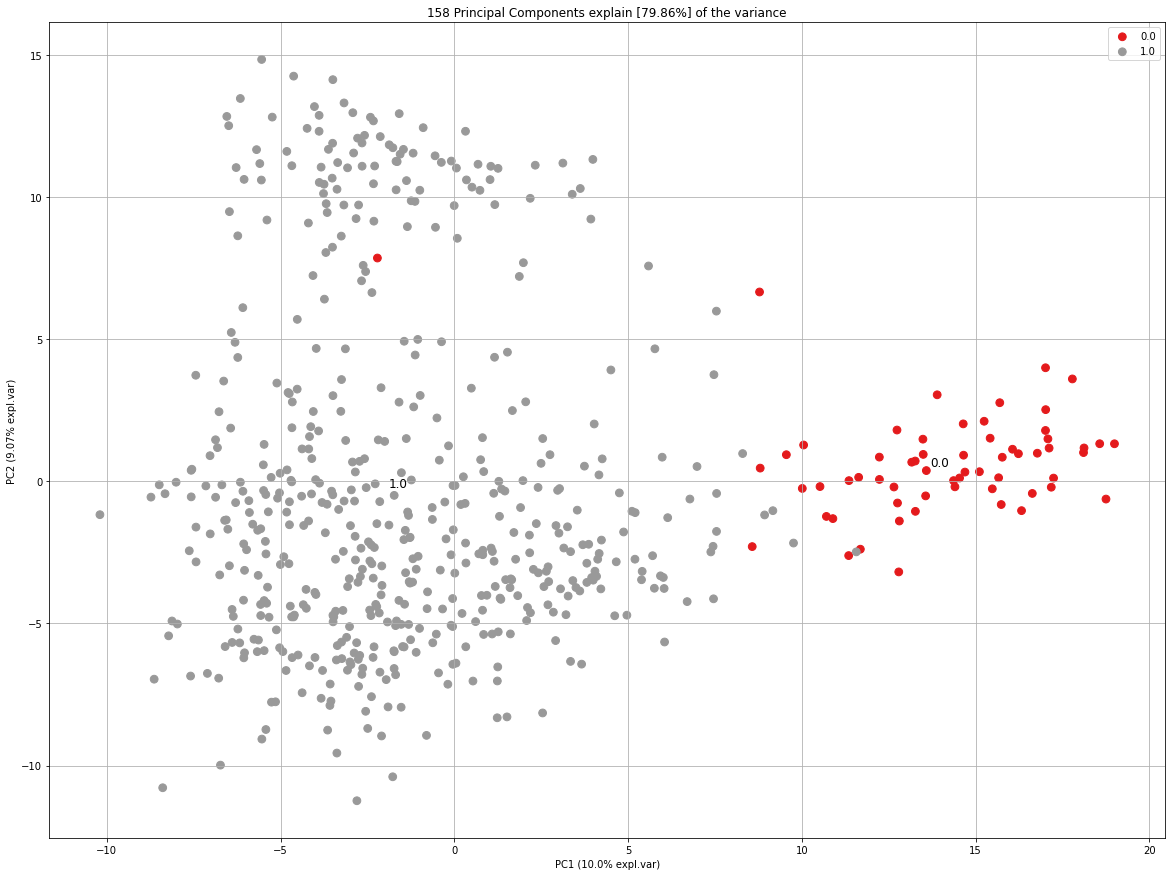

In [40]:
# 158개의 주성분을 시각화
model = pca(n_components=158)

label = data.drop('Label',axis=1).columns
y = list(data['Label'])
X = pd.DataFrame(data=np.array(data.drop('Label',axis=1)), columns=label, index=y)


results = model.fit_transform(X)

fig, ax = model.scatter()

[0.1001694  0.19090126 0.23299014 0.26937049 0.29699495 0.32115984
 0.34214953 0.36206816 0.37781816 0.39297017 0.40535714 0.41678815
 0.42767048 0.43781788 0.44733244 0.45603611 0.46441954 0.47239266
 0.48000386 0.48745295 0.49434311 0.50114452 0.50737481 0.51324221
 0.51900017 0.52469689 0.53031715 0.53555109 0.5406626  0.54561007
 0.55040136 0.55491925 0.55938002 0.56365651 0.56781181 0.57186505
 0.57578494 0.57968643 0.58353033 0.58729053 0.5910401  0.59469366
 0.59817507 0.60161089 0.60490805 0.60818355 0.61138658 0.61453654
 0.61764404 0.6206818  0.62367228 0.62660858 0.62948546 0.63231696
 0.63514183 0.6378769  0.64058745 0.6432484  0.64586184 0.6484553
 0.65098596 0.6534814  0.65594515 0.65837446 0.66074213 0.66309895
 0.6654183  0.66772029 0.66999596 0.67225343 0.67447884 0.67661745
 0.6787412  0.68083517 0.68291231 0.68496535 0.68699553 0.68901346
 0.69098859 0.69295422 0.69490471 0.69682526 0.69873791 0.7006209
 0.70245324 0.70426866 0.70608038 0.70786964 0.70964287 0.711384

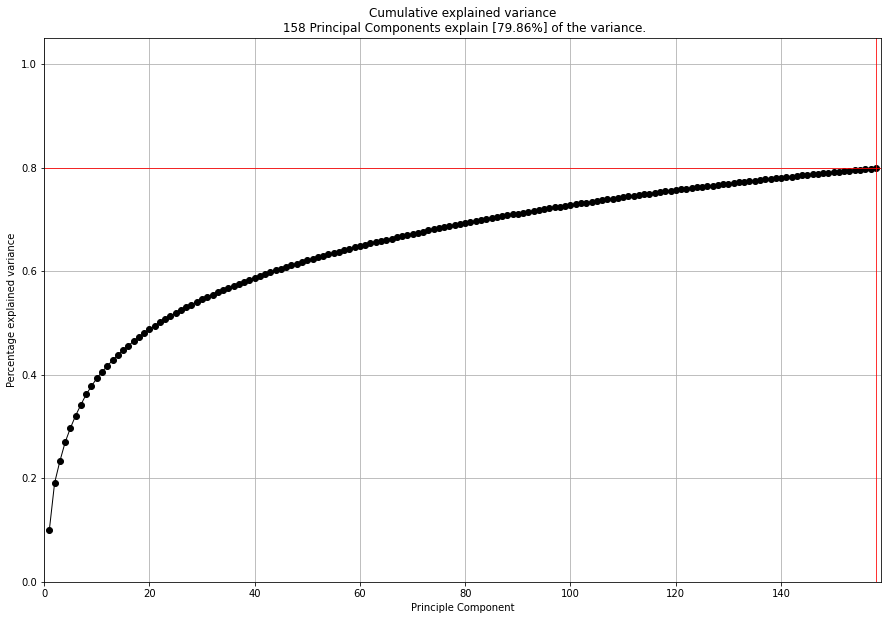

<Figure size 432x288 with 0 Axes>

In [41]:
# Cumulative explained variance
print(model.results['explained_var'])

# Explained variance per PC
print(model.results['variance_ratio'])

# Make plot
fig, ax = model.plot()

[pca] >Cleaning previous fitted model results..
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [17814] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[158]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


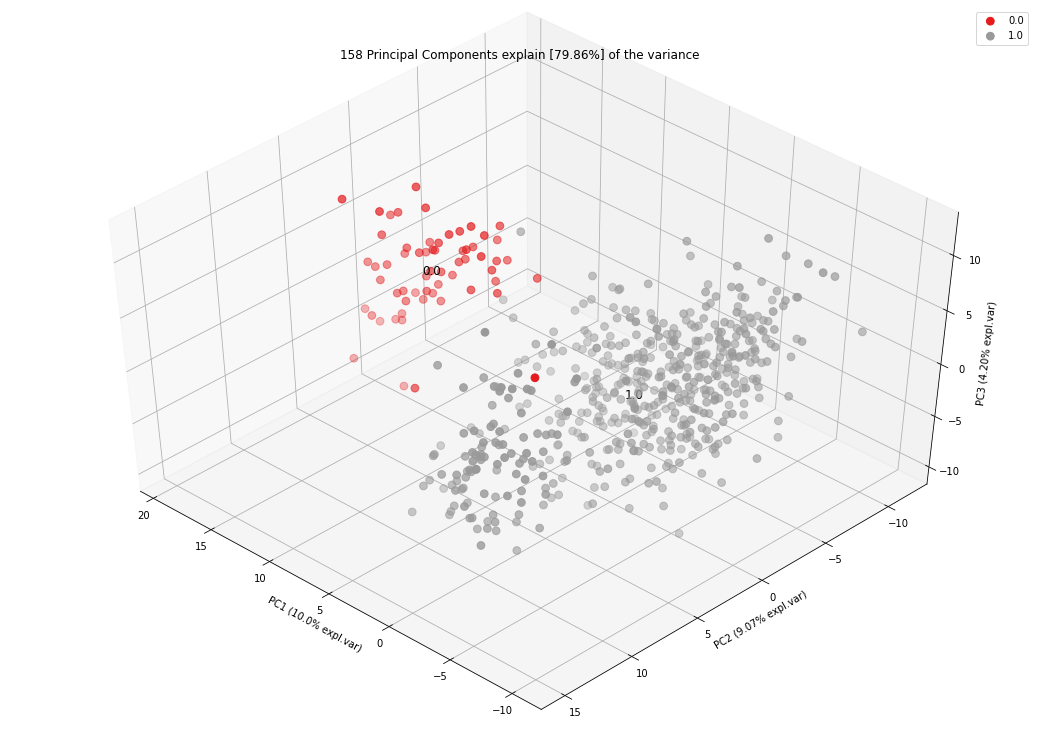

In [42]:
# 3차원에서 확인
results = model.fit_transform(X)

fig, ax = model.scatter3d()

[pca] >Plot PC1 vs PC2 with loadings.


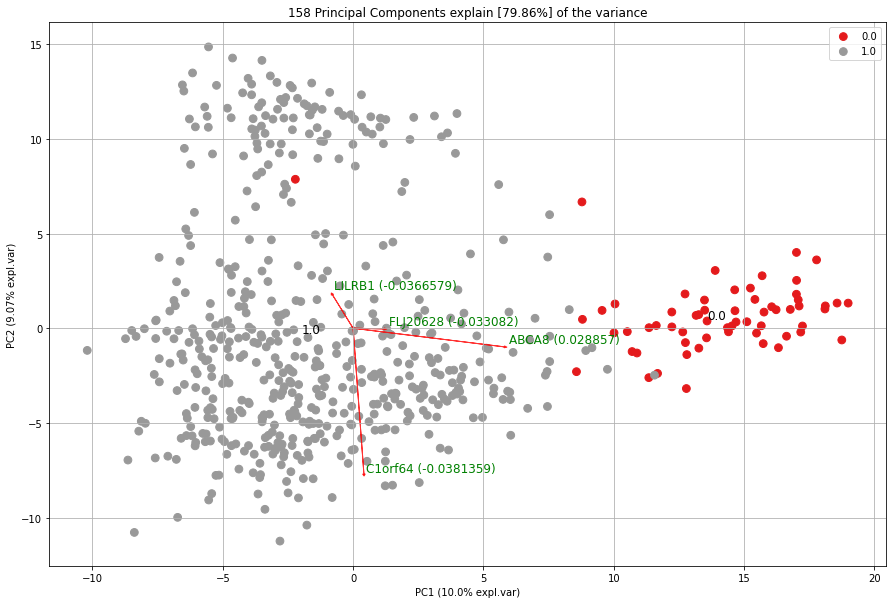

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


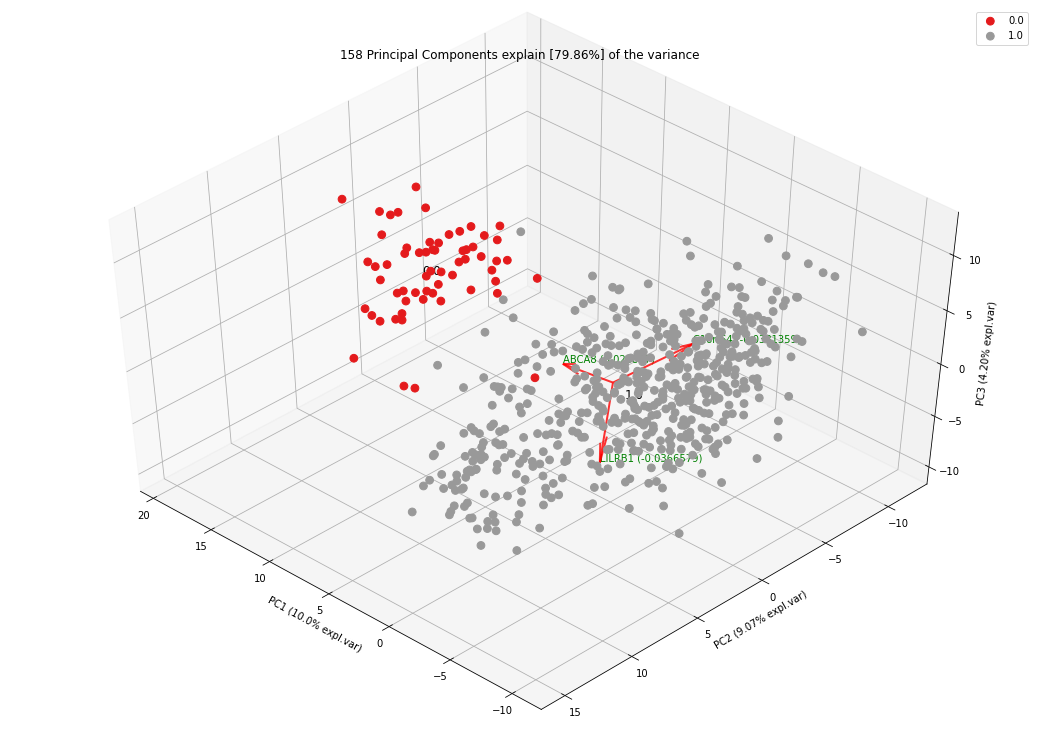

In [43]:
# 2D plot
fig, ax = model.biplot(n_feat=4, PC=[0,1])

# 3d Plot
fig, ax = model.biplot3d(n_feat=2, PC=[0,1,2])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [17814] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[158]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


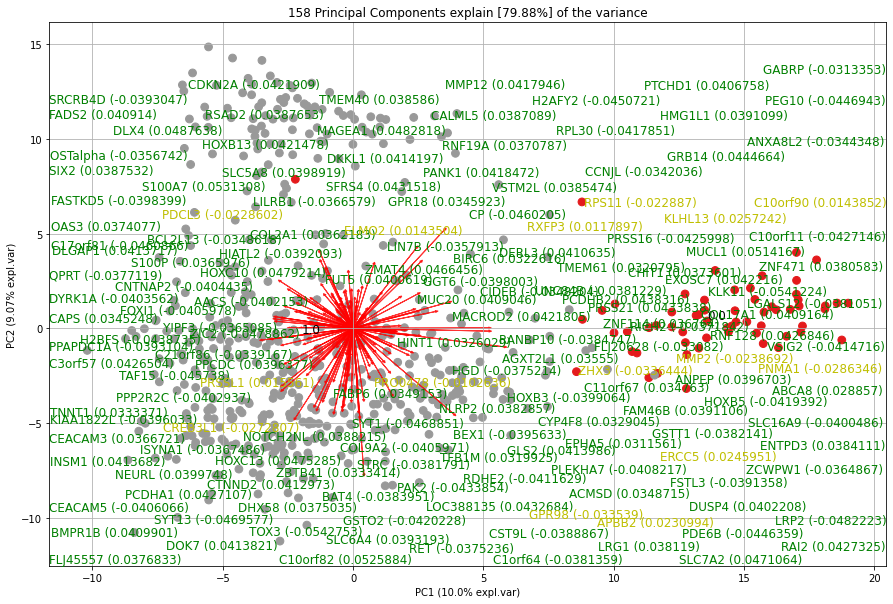

In [44]:
# 그래프로 나타내기
model = pca(n_components=158)
results = model.fit_transform(X)
fig, ax = model.biplot(n_feat=158, legend=False)

주성분 개수를 158개로 설정한 데이터프레임을 생성합니다. 이 데이터프레임을 모델링에 사용할 예정입니다. 

In [45]:
# 주성분 개수를 158으로 설정해 분석
pca = PCA(n_components=158)
pca_array = pca.fit_transform(data_nolabel)
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns=[f"pca{num+1}" for num in range(158)])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca149,pca150,pca151,pca152,pca153,pca154,pca155,pca156,pca157,pca158
0,-3.497995,14.142008,0.475765,0.440916,4.004307,1.589153,3.097580,-1.171994,-1.144583,-2.850921,...,0.779128,-1.162573,-0.336043,-1.179926,1.258856,0.398783,0.525995,2.019160,-0.804342,0.615828
1,17.781581,3.608124,9.129485,-1.461360,13.223585,0.407321,-4.344074,-3.397175,0.594744,1.208631,...,-1.382210,0.997891,0.568116,-0.509774,-0.685400,1.626843,-0.445821,-0.698798,0.516953,0.903247
2,-6.295652,-0.745238,-1.041797,-0.880179,1.815481,2.024225,-0.705017,1.044104,-1.043003,3.214451,...,0.739965,1.087578,0.162528,-1.046491,-0.148874,0.368273,0.092381,-0.187872,-0.721796,-0.945766
3,3.025347,-0.251247,-6.881121,-0.325487,0.605867,-4.236097,3.277778,2.440079,-0.361167,-1.248738,...,0.329142,-0.281022,0.231975,0.060045,0.091916,-0.211453,0.018898,0.327257,-0.423335,0.281572
4,-5.660756,-1.719229,-3.177945,1.451913,1.770148,2.366199,-4.027274,1.727046,2.521723,1.826537,...,-0.541030,0.576083,-0.127476,0.207613,0.654426,0.016572,-0.840235,0.004017,-0.415518,-0.208053


In [46]:
# 158개의 feature가 생성된 주성분분석 df를 사용해 학습 진행 예정 (다시 Label 열을 붙여준다)
pca_df['Label']=data['Label']
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca150,pca151,pca152,pca153,pca154,pca155,pca156,pca157,pca158,Label
0,-3.497995,14.142008,0.475765,0.440916,4.004307,1.589153,3.097580,-1.171994,-1.144583,-2.850921,...,-1.162573,-0.336043,-1.179926,1.258856,0.398783,0.525995,2.019160,-0.804342,0.615828,1.0
1,17.781581,3.608124,9.129485,-1.461360,13.223585,0.407321,-4.344074,-3.397175,0.594744,1.208631,...,0.997891,0.568116,-0.509774,-0.685400,1.626843,-0.445821,-0.698798,0.516953,0.903247,0.0
2,-6.295652,-0.745238,-1.041797,-0.880179,1.815481,2.024225,-0.705017,1.044104,-1.043003,3.214451,...,1.087578,0.162528,-1.046491,-0.148874,0.368273,0.092381,-0.187872,-0.721796,-0.945766,1.0
3,3.025347,-0.251247,-6.881121,-0.325487,0.605867,-4.236097,3.277778,2.440079,-0.361167,-1.248738,...,-0.281022,0.231975,0.060045,0.091916,-0.211453,0.018898,0.327257,-0.423335,0.281572,1.0
4,-5.660756,-1.719229,-3.177945,1.451913,1.770148,2.366199,-4.027274,1.727046,2.521723,1.826537,...,0.576083,-0.127476,0.207613,0.654426,0.016572,-0.840235,0.004017,-0.415518,-0.208053,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,1.648665,-3.459976,-3.422436,2.642659,-2.381847,0.181665,-3.780790,1.087550,1.611618,-1.815659,...,-0.560479,-0.376844,-0.116058,0.312099,-0.761704,0.895192,-0.488437,0.022059,-0.431083,1.0
586,11.345238,-2.609582,3.153594,-4.114752,-2.978847,-2.159004,2.704129,0.432069,1.958999,2.513489,...,-0.295573,0.234735,0.380221,0.096673,-0.397111,-0.122607,0.195603,-0.025962,-0.139806,0.0
587,1.255276,11.020397,-5.673847,-2.851700,0.570069,2.002226,7.384836,2.359616,0.858909,-1.210444,...,0.314741,0.962174,0.175404,0.033355,0.628513,0.268301,-0.018227,0.478246,-0.565740,1.0
588,4.044162,-3.159617,0.764372,2.180295,2.296061,-2.677947,-1.945606,-0.051591,1.658208,-1.897761,...,0.183286,1.138613,-0.738765,0.397842,-0.028802,-0.643051,0.310162,0.127612,-0.201841,1.0


In [47]:
# pca 처리한 데이터 저장
# pca_df.to_csv(base_path+'/pcaDF.csv')

In [48]:
# pca_df = pd.read_csv(base_path+'/pcaDF.csv', index_col=0)
# pca_df

## 3.모델링 및 성능평가
데이터셋 분할, 모델 학습 및 성능평가를 진행합니다.  
stratified 5-fold를 이용했고, 사용한 모델은 다음과 같습니다.
- logistic regression
- decision tree
- svm
- random forest
- adaboost
- gradient boosting(gbm)
- xgboosting
- lgbm
- catboost
개별 모델을 학습 후, 여러 개별 모델을 softvoting을 이용해 앙상블 또한 진행했습니다.

#### 1) 개별 머신러닝 모델 사용

In [49]:
# Stratified 5-Fold로 데이터 분할
# train:test = 8:2
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

X = np.array(pca_df.iloc[:, :-1]) # features
y = pca_df['Label'] # label

# models
dt = DecisionTreeClassifier(random_state=100)
rf = RandomForestClassifier(random_state=100)
lr = LogisticRegression(random_state=100)
gbm = GradientBoostingClassifier(random_state=100)
lgbm = LGBMClassifier(random_state=100)
xgbm = XGBClassifier(random_state = 100)
adaboost = AdaBoostClassifier(random_state=100)
svm = SVC(probability=True, random_state=100)
catboost = CatBoostClassifier(random_state=100)

model_name = ['Decision Tree','Random Forest','Logistic Regression','Gradient Boosting','LGBM','XGB','AdaBoost','SVM','CatBoost']

models = [dt, rf, lr, gbm, lgbm, xgbm, adaboost, svm, catboost]

# 성능 지표 DF 생성
evaluation = pd.DataFrame(columns=['Algorithm','Accuracy','Specificity','Precision','Recall','F1-score'])

for i, model in enumerate(models):

  # fold별 데이터 저장
  accuracy_history = []
  confusion_matrix_history = []
  precision_history = []
  recall_history = []
  f1_history = []
  specificity_history = []

  for train_index, test_index in str_kf.split(X, y):
      #print(len(train_index)) # 472
      #print(len(test_index)) # 118
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]

      model = model
      model.fit(X_train, y_train)

      y_pred = model.predict(X_test) # label pred

      # 성능 평가
      accuracy_history.append(accuracy_score(y_pred, y_test))
      confusion_matrix_history.append(confusion_matrix(y_pred,y_test))
      precision_history.append(precision_score(y_pred, y_test))
      recall_history.append(recall_score(y_pred, y_test))
      f1_history.append(f1_score(y_pred, y_test))
      specificity_history.append(specificity_score(y_pred, y_test))

      #print(classification_report(y_pred, y_test, target_names=['normal', 'tumor']))
      
  # print(confusion_matrix_history)
  # print("")

  # 성능 출력
  #print('%s 성능'%model_name[i])
  ##print("%s Fold별 정확도 :"% model, accuracy_history)
  #print("accuracy: {:.2f}".format(np.mean(accuracy_history)))
  #print("specificity: {:.2f}".format(np.mean(specificity_history)))
  #print("precision: {:.2f}".format(np.mean(precision_history)))
  #print("recall: {:.2f}".format(np.mean(recall_history)))
  #print("f1 score: {:.2f}".format(np.mean(f1_history)))
  #print("")

  # 성능 DF에 데이터 추가
  evaluation = evaluation.append({'Algorithm':model_name[i],
                     'Accuracy':round(np.mean(accuracy_history),3),
                     'Specificity':round(np.mean(specificity_history),3),
                     'Precision':round(np.mean(precision_history),3),
                     'Recall':round(np.mean(recall_history),3),
                     'F1-score':round(np.mean(f1_history),3)},
                    ignore_index=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4:	learn: 0.6237092	total: 99.3ms	remaining: 19.8s
5:	learn: 0.6117947	total: 109ms	remaining: 18.1s
6:	learn: 0.6008656	total: 119ms	remaining: 16.9s
7:	learn: 0.5896081	total: 129ms	remaining: 16s
8:	learn: 0.5785288	total: 138ms	remaining: 15.2s
9:	learn: 0.5650146	total: 148ms	remaining: 14.7s
10:	learn: 0.5531815	total: 158ms	remaining: 14.2s
11:	learn: 0.5418689	total: 168ms	remaining: 13.9s
12:	learn: 0.5301326	total: 178ms	remaining: 13.5s
13:	learn: 0.5194894	total: 188ms	remaining: 13.2s
14:	learn: 0.5091771	total: 198ms	remaining: 13s
15:	learn: 0.5004522	total: 210ms	remaining: 12.9s
16:	learn: 0.4922341	total: 220ms	remaining: 12.7s
17:	learn: 0.4832136	total: 230ms	remaining: 12.6s
18:	learn: 0.4743148	total: 240ms	remaining: 12.4s
19:	learn: 0.4659115	total: 251ms	remaining: 12.3s
20:	learn: 0.4568726	total: 261ms	remaining: 12.1s
21:	learn: 0.4479588	total: 271ms	remaining: 12.1s
22:	learn: 0.4392634	total: 281ms	remaining: 11.9s
23:	

In [50]:
# 모델 성능 한 번에 보기
evaluation

,Algorithm,Accuracy,Specificity,Precision,Recall,F1-score
0,Decision Tree,0.983,0.921,0.991,0.991,0.991
1,Random Forest,0.966,0.978,0.998,0.965,0.981
2,Logistic Regression,0.997,0.973,0.996,1.000,0.998
3,Gradient Boosting,0.983,0.922,0.991,0.991,0.991
4,LGBM,0.988,0.954,0.994,0.992,0.993
5,XGB,0.992,0.943,0.992,0.998,0.995
6,AdaBoost,0.992,0.971,0.996,0.994,0.995
7,SVM,0.993,0.971,0.996,0.996,0.996
8,CatBoost,0.988,0.927,0.991,0.996,0.993


모두 f1-score 99%에 가까운 정확도를 보여줍니다.  
성능을 조금 더 향상하고자 위의 개별 모델 여러 개를 합쳐 soft voting 앙상블 기법을 적용해보았습니다.

#### 2) soft voting 앙상블

In [51]:
# voting 모델
voting_model = VotingClassifier(estimators=[('Logistic Regression',lr),('AdaBoost', adaboost),('SVM', svm)], voting='soft')

# 모델 학습
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

# 성능 평가
accuracy= accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
specificity = specificity_score(y_pred, y_test)

print('Voting Classifier의 성능')
print("accuracy: {:.2f}".format(np.mean(accuracy)))
print("specificity: {:.2f}".format(np.mean(specificity)))
print("precision: {:.2f}".format(np.mean(precision)))
print("recall: {:.2f}".format(np.mean(recall)))
print("f1 score: {:.2f}".format(np.mean(f1)))

Voting Classifier의 성능
accuracy: 0.97
specificity: 0.86
precision: 0.98
recall: 0.99
f1 score: 0.99


In [52]:
# 위에서 만든 성능 테이블에 해당 성능을 추가해줍니다
evaluation = evaluation.append({'Algorithm':'Voting Classifier',
                     'Accuracy':round(np.mean(accuracy),3),
                     'Specificity':round(np.mean(specificity),3),
                     'Precision':round(np.mean(precision),3),
                     'Recall':round(np.mean(recall),3),
                     'F1-score':round(np.mean(f1),3)},
                    ignore_index=True)

Logistic Regression, Adaboost, SVM을 soft voting할 경우, 잘못 예측한 경우가 하나도 없이 모두 100%의 정확도를 보여주었습니다.

#### 3) 딥러닝 모델 TabNet 이용
정형 데이터에 특화된 DT기반 TabNet을 이용해 학습 및 성능을 평가해보았습니다.  
[TabNet 설명](https://github.com/dreamquark-ai/tabnet)

In [ ]:
clf = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=1e-2),
                       scheduler_params={"step_size":50,
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='sparsemax' # "sparsemax", entmax
                      )

In [ ]:
max_epochs = 150

clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train)],
    eval_metric=['accuracy','balanced_accuracy','logloss'],
    max_epochs=max_epochs , patience=20,
    batch_size=64, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
)

epoch 0  | loss: 0.76768 | val_0_accuracy: 0.36229 | val_0_balanced_accuracy: 0.6081  | val_0_logloss: 0.74598 |  0:00:00s
epoch 1  | loss: 0.71423 | val_0_accuracy: 0.23729 | val_0_balanced_accuracy: 0.557   | val_0_logloss: 0.80758 |  0:00:00s
epoch 2  | loss: 0.7095  | val_0_accuracy: 0.23517 | val_0_balanced_accuracy: 0.56506 | val_0_logloss: 0.79727 |  0:00:00s
epoch 3  | loss: 0.6734  | val_0_accuracy: 0.19068 | val_0_balanced_accuracy: 0.54953 | val_0_logloss: 0.85173 |  0:00:00s
epoch 4  | loss: 0.66513 | val_0_accuracy: 0.24788 | val_0_balanced_accuracy: 0.57213 | val_0_logloss: 0.79014 |  0:00:01s
epoch 5  | loss: 0.63647 | val_0_accuracy: 0.30297 | val_0_balanced_accuracy: 0.61203 | val_0_logloss: 0.76321 |  0:00:01s
epoch 6  | loss: 0.59249 | val_0_accuracy: 0.24788 | val_0_balanced_accuracy: 0.58137 | val_0_logloss: 0.82678 |  0:00:01s
epoch 7  | loss: 0.55764 | val_0_accuracy: 0.27542 | val_0_balanced_accuracy: 0.58746 | val_0_logloss: 0.83544 |  0:00:01s
epoch 8  | loss:

/usr/local/lib/python3.8/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



In [ ]:
y_pred = clf.predict(X_test)

# 성능 평가
accuracy= accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
specificity = specificity_score(y_pred, y_test)

print('TabNet의 성능')
print("accuracy: {:.2f}".format(np.mean(accuracy)))
print("specificity: {:.2f}".format(np.mean(specificity)))
print("precision: {:.2f}".format(np.mean(precision)))
print("recall: {:.2f}".format(np.mean(recall)))
print("f1 score: {:.2f}".format(np.mean(f1)))

TabNet의 성능
accuracy: 0.98
specificity: 1.00
precision: 1.00
recall: 0.98
f1 score: 0.99


In [95]:
# 위에서 만든 성능 테이블에 해당 성능을 추가해줍니다
evaluation = evaluation.append({'Algorithm':'TabNet',
                     'Accuracy':round(np.mean(accuracy),3),
                     'Specificity':round(np.mean(specificity),3),
                     'Precision':round(np.mean(precision),3),
                     'Recall':round(np.mean(recall),3),
                     'F1-score':round(np.mean(f1),3)},
                    ignore_index=True)

학습 파라미터 조정 결과 99%의 f1 score를 얻었습니다.

다음은 모든 모델에 대한 성능을 나타낸 테이블입니다.

In [96]:
evaluation

,Algorithm,Accuracy,Specificity,Precision,Recall,F1-score
0,Decision Tree,0.983,0.921,0.991,0.991,0.991
1,Random Forest,0.966,0.978,0.998,0.965,0.981
2,Logistic Regression,0.997,0.973,0.996,1.000,0.998
3,Gradient Boosting,0.983,0.922,0.991,0.991,0.991
4,LGBM,0.988,0.954,0.994,0.992,0.993
5,XGB,0.992,0.943,0.992,0.998,0.995
6,AdaBoost,0.992,0.971,0.996,0.994,0.995
7,SVM,0.993,0.971,0.996,0.996,0.996
8,CatBoost,0.988,0.927,0.991,0.996,0.993
9,Voting Classifier,0.975,0.857,0.981,0.990,0.986
